# **Modelling motor proteins with random walk in a ratchet potential switched on and of**

# **Excercise 1:** _The diffusion equation_
<hr>


## **a)**

We are given the function:

$$
\phi(x,t) = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy.
$$

We want to show that it satisfies the diffusion equation:

$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}.
$$


### **Step 1: Compute $ \frac{\partial \phi}{\partial t} $**

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left[ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \right].
$$

Using the product rule we obtain

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4\pi D t}} \right)  \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy
+ \frac{1}{\sqrt{4\pi D t}} \frac{\partial}{\partial t} \left( \int_{-\infty}^{\infty} h(y)  e^{-\frac{(x-y)^2}{4Dt}} \, dy \right).
$$
Furthermore, applying the Lebniz integration rule:

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4\pi D t}} \right) \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy
+ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) \frac{\partial}{\partial t} e^{-\frac{(x-y)^2}{4Dt}} \, dy.
$$

Differentiating the prefactor and the exponential term gives

$$
\frac{d}{dt} \left( \frac{1}{\sqrt{4\pi D t}} \right) = -\frac{1}{2} \frac{1}{\sqrt{4\pi D t^3}}.
$$


$$
\frac{\partial}{\partial t} \left( e^{-\frac{(x-y)^2}{4Dt}}\right) = e^{-\frac{(x-y)^2}{4Dt}} \cdot \frac{(x-y)^2}{4D t^2}.
$$
Substituting back, we obtain

$$
\frac{\partial \phi}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi D t^3}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \cdot \frac{(x-y)^2}{4D t^2}.
$$
Which simplifies to
$$
\frac{\partial \phi}{\partial t} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left( \frac{(x-y)^2}{4D t^2} - \frac{1}{2t} \right) \, dy.
$$
<hr>


### **Step 2: Compute $ \frac{\partial^2 \phi}{\partial x^2} $**
$$
\frac{\partial \phi}{\partial x} = \frac{\partial}{\partial x} \left[ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \right].
$$

Using the chain rule

$$
\frac{\partial \phi}{\partial x} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left(-\frac{x-y}{2Dt}\right) \, dy.
$$

Differentiating again

$$
\frac{\partial^2 \phi}{\partial x^2} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left( \frac{(x-y)^2}{4D^2 t^2} - \frac{1}{2Dt} \right) \, dy.
$$
<hr>

### **Step 3: Verify the Diffusion Equation**

Comparing the expressions for $ \frac{\partial \phi}{\partial t} $ and $ D \frac{\partial^2 \phi}{\partial x^2} $, we find that:

$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}.
$$

Thus, $ \phi(x,t) $ satisfies the diffusion equation.
<hr>

## **1b)**
From the probability of finding a particle at a position $x$ in a potential landscape $V(x)$ as $$ P(x) = \frac{e^{-\beta V(x)}}{Z},$$ we are going to show how this results in the following probabilities for the particles movement:

$$ p^+ = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}}$$
$$p^0 = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}$$
$$p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}.$$

By inserting the definition of the canonical partition function $Z$ with the energy being equal to the potential energy $V(x)$ at different positions, we obtain:


$$ P(x) = \frac{e^{-\beta V(x)}}{Z} = \frac{e^{-\beta V(x)}}{e^{-\beta V(x_0-1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 +1)}}$$


Since the probability of finding a particle at a position $x$ must be equal to the probability of the particle moving to $x$, we find the probability of the particle moving to $x_0 - 1$ as:


$$ p^-  = P(x_0-1) = \frac{e^{-\beta V(x_0-1)}}{e^{-\beta V(x_0-1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 +1)}}.$$ 

Doing the algebra and simplifying gives

$$ p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}.$$


By repeating this process for the remaining steps $x_0$ and $x_0 + 1$, we obtain:


$$p^0 = P(X_0) = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}$$

$$p^+ = P(X_0+1) = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}} \quad \blacksquare.$$  
<hr>



## **1c)**

### First case: $k_B T$ $\gg$ $\lvert V(x+1) - V(x) \rvert$

One can see that for the boundary condition when $k_B T$ $\gg$ $\lvert V(x+1) - V(x) \rvert$, each exponential term in the denominator in the three probablities {${p^+, p^0, p^-}$} goes to 1. 

- For $p^+$, we notice that the third term in the denominator describes the potential difference between two adjacent poential steps. Given the boundary condition, this potential difference is significantly smaller than $k_B T$. This yields an expression $e$ to the power of 0, making the exponential term go towards 1. For the second term, we notice that this describes the potential difference between $x_0-1$ and $x_0+1$, giving us the expression $\frac {2 \lvert V(x+1) - V(x) \rvert} {k_B T}$ in the exponent, which will also have the term go towards 1. Resulting in the probablitiy $p^+$ going towards $\frac 1 3$.

- For $p^0$, we notice that both the exponential terms describe a potential step from $x_0$ to $±1$. Similarly for the case of $p^+$, these terms are significantly smaller than $k_B T$, making each term go towards 1, ultimately letting the probability $p^0$ go towards $\frac 1 3$

- For $p^-$, we use the same arguments as for $p^+$. The exponents in both the exponential terms are both significantly smaller than $k_B T$, which yields a $e$ to the power of 0, also giving a probability of $\frac 1 3$.

As a final remark, one may notice that the sum of each probability {${p^+, p^0, p^-}$} sums up to 1, following the law of conservation of probability.
<hr>

### **Second case: $k_B T$ $\ll$ $\lvert V(x+1) - V(x) \rvert$**

For the case where $k_B T$ $\ll$ $\lvert V(x+1) - V(x) \rvert$, we will see that one of the expressions will go to 1, while the other two expressions will die out and go towards 0. We consider $V(x_0-1)$, $V(x_0)$, and $V(x_0+1)$ to be respective potential steps, and will assume that $V(x_0-1)$ $\ll$ $V(x_0)$ $\ll$ and $V(x_0+1)$. Using this, we may examine each of the exponential terms in the three expressions:
- For $p^+$, we notice that $V(x_0-1)-V(x_0+1)$ will yield a negative number. Using the given boundary condition, we are now considering a negative number divided by $\beta$, a significantly smaller number. The whole term will then yield $e$ to the power of a large positive number, resulting in the term exploding towards infinity. For $V(x_0)-V(x_0+1)$, we notice that this will produce a negative number similar to the former term. However, due to the explosive growth of the exponential function, this term will be negligible. At last, the boundary condition will have $å^+$ go towards 0

- For $p^0$, following the same steps as above, we notice that the denominator will quickly explode to infinity, yielding a propability of 0.

- For $p^-$, we now notice that both the exponential terms, $V(x_0+1)-V(x_0-1)$ and $V(x_0)-V(x_0-1)$, have exponents yielding a positive number. This will result in both terms being raised to the power of negative infinity, making them decay quickly. This will result in $p^-$ going towards 1.

Similarly to the first case, the probability is conserved.
<hr>

### **Simplifying the random walk using an energy scale argument**
Using an energy scale argument, we consider the two extremes described in the two boundary conditions. In one extreme, the temperature is significantly larger than the energy potentials and as discussed above, this results in the energy potential being negligible to the probability. In the second extreme case the temperature is significantly smaller than the potentials. As a result, the energy potential plays the dominating role for the probabability. This is assuming that the potential energy grows monotonously as $x$ goes from smaller to bigger values of $x$. However, this might not always be the case. The potential might decrease monotonously, and it might oscillate. This will however not change the proposed argument. For higher temperatures, the potential will still be negligible, while lower temperatures will have probabilities dependant on the potential differences. 
<hr>

# **Excercise 2:** _Random walk in a potential_
<hr>

In this task we are going to plot the distrubution of the particles after random walking. The first part of this task contains the main code. All the partial assignments will send values to this main code. 

In [ ]:
## IMPORTING LIBRARIES
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
class Particle:
    def __init__(self, potentialFunction, betak):
        self.x = 0
        self.V = potentialFunction
        self.betak = betak

    def pPlus(self):
        return 1 / (1 + np.exp(-self.betak * (self.V(self.x - 1) - self.V(self.x + 1))) 
                    + np.exp(-self.betak * (self.V(self.x) - self.V(self.x + 1))))
    
    def pMinus(self):
        return 1 / (1 + np.exp(-self.betak * (self.V(self.x + 1) - self.V(self.x - 1))) 
                    + np.exp(-self.betak * (self.V(self.x) - self.V(self.x - 1))))


    def walkStep(self):
        prob = random.uniform(0, 1)
        if prob <= self.pMinus():
            self.x -= 1
        if prob > 1 - self.pPlus():
            self.x += 1
        else:
            self.x = self.x
    
    def getPos(self):
        return self.x
    
    def getProb(self):
        return float(self.pMinus()), float(1 - (self.pPlus() + self.pMinus())), float(self.pPlus())
    

In [37]:
## HOVEDFUNKSJONEN SOM UTFØRER BEREGNINGENE

def calculation(V, name):
    betakList = [0.01, 1, 100]
    fig, ax = plt.subplots(1, 3, figsize=(13, 4))

    for i, betak in enumerate(betakList):
        Particles = [Particle(V, betak) for _ in range(numberOfParticles)]
        for j, _ in enumerate(range(numberOfSteps)):
            #print(f'Step: {j} with beta*k = {betak}')
            for particle in Particles:
                particle.walkStep()

        positions = np.array([particle.getPos() for particle in Particles])
        mu, sigma = stats.norm.fit(positions)
        x = np.linspace(min(positions), max(positions), 1000)
        pdf = stats.norm.pdf(x, mu, sigma)
        ax[i].plot(x, pdf, 'r-', label=f"μ={mu:.2f}, σ={sigma:.2f}, βk {betak}")
        ax[i].hist(positions, bins=20, density=True, alpha=0.6, color='g')
        ax[i].set_title(f"βk = {betak}")
        ax[i].set_xlabel("Position")
        ax[i].set_ylabel("Probability density")
        ax[i].legend(loc='upper left')

    fig.suptitle(f"Particle distribution with potential {name}")
    plt.show()

numberOfParticles = 10_000 
numberOfSteps = 200

V = {'k' : lambda x: 1,
     '-k*x' : lambda x: -x, 
     'k(x/15 - np.cos(x/3))' : lambda x: x/15 - np.cos(x/3), 
     'k*x**4' : lambda x: x**4}



## 2a)

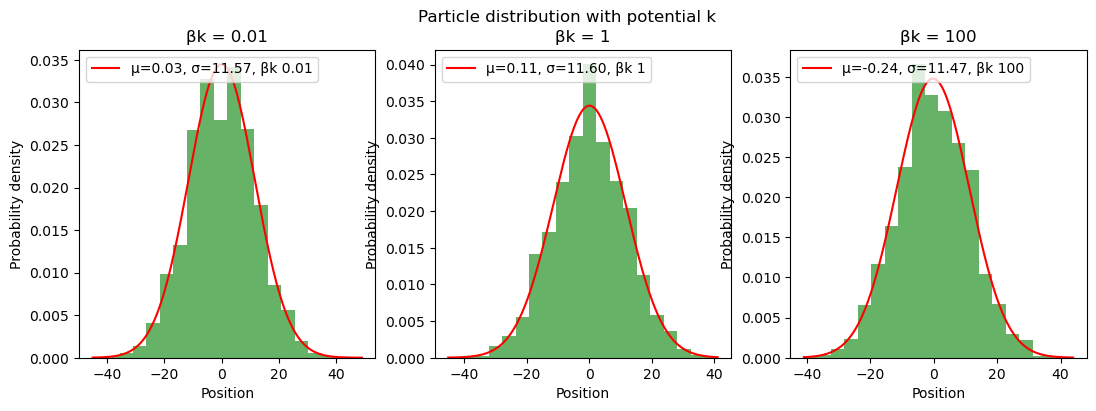

In [38]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k'], "k")

## 2b)

/Users/heddakarinenerby/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


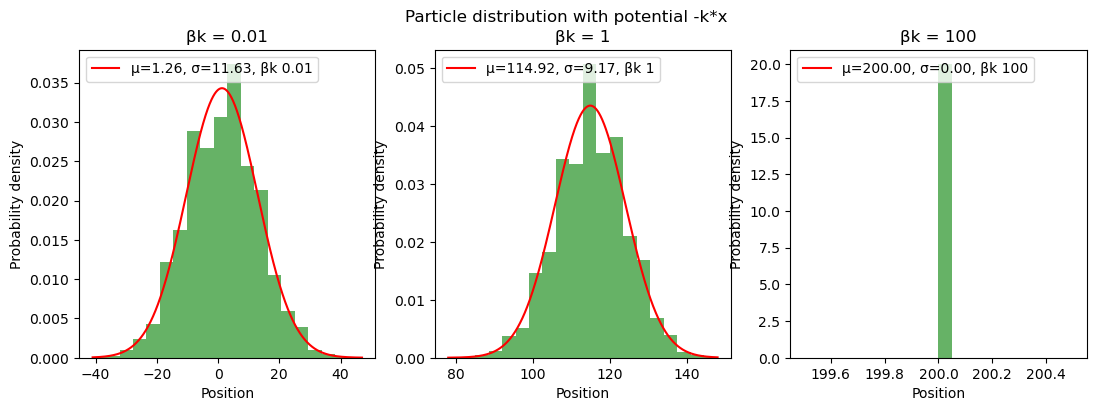

In [39]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['-k*x'], "-k*x")

# 2c)

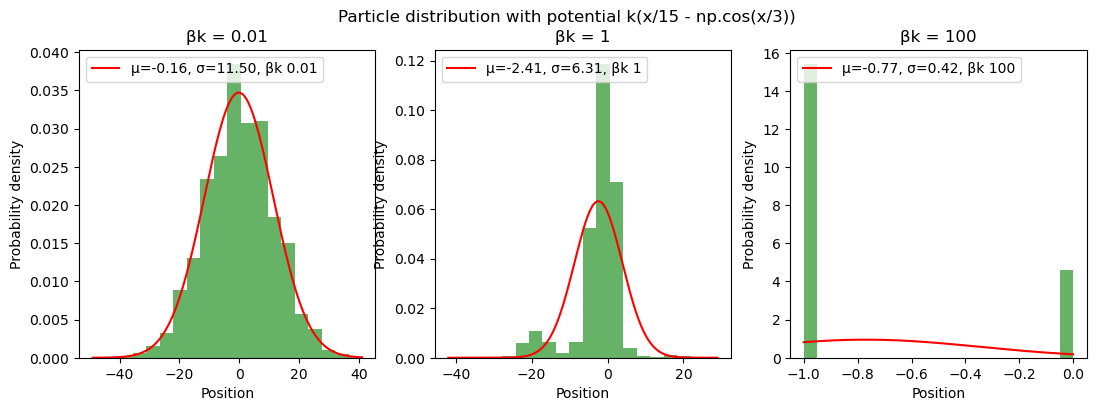

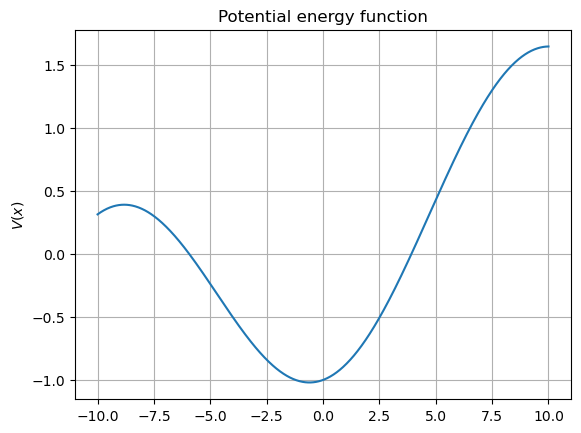

In [40]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k(x/15 - np.cos(x/3))'], 'k(x/15 - np.cos(x/3))')

# Plotting the potential 
x = np.linspace(-10,10,1000)
y = [V['k(x/15 - np.cos(x/3))'](i) for i in x]
plt.ylabel("$V(x)$")
plt.title("Potential energy function")
plt.plot(x, y)
plt.grid()
plt.show()


As the plots show, there is a big difference in the distribution of particles between $\beta k = 1$ and $\beta k = 100$. When $\beta k$ is high, the temperature must be low since $\beta = \frac{1}{k_BT}$. From 1c) we know that the movement of the particles will be primarily determined by the potential energy $V(x)$ when the temperature is low. The potential energy function shows a potential well, where the particles will have the least energy at the bottom. The particles initial position is at $x_0 = 0$, and a step to the right will result in the particle gaining more energy. Since every systems seek least energy, it is highly unlikely that the particles will move to the right. The energy is the lowest between the positions 0 and -1, and hence the particles will most likely wither stay put, or move to the left. However, if the particles move to the left, there wil be less energy there and therefore it is more probability that the particles will move to the left.

## 2d)

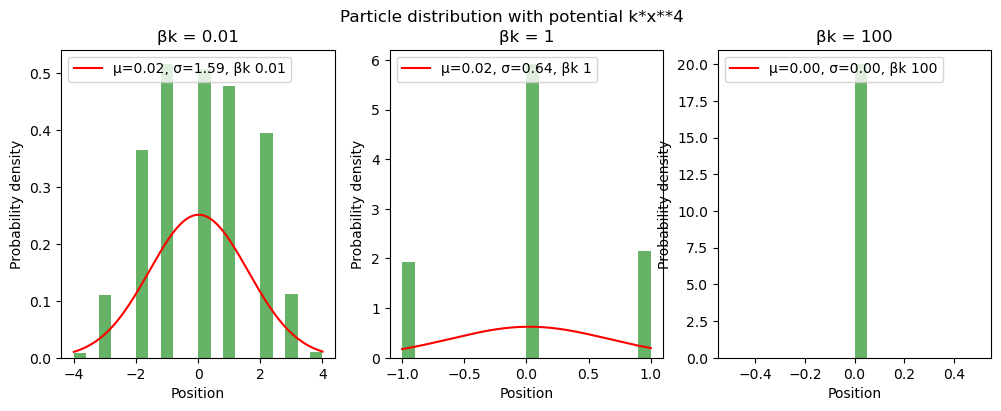

In [17]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k*x**4'], 'k*x**4')

## **Excercise 3**

## 3a)

## 3b)

## 3c)

## **Excercise4**

## 4a)

## 4b)

## 4c)

## 4d)